# 3 Linear regression with multiple variables

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from utils import *

# %matplotlib notebook
%matplotlib inline

In [2]:
data = pd.read_csv('../data/ex1data2.txt', header=None)
data.columns = ['size', 'bedrooms', 'price']
data.head()
# data1.describe()
# data1.dtypes

,size,bedrooms,price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


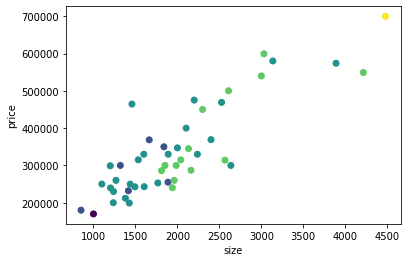

In [3]:
plt.scatter('size', 'price', data=data, c='bedrooms')
plt.xlabel('size')
plt.ylabel('price')
plt.show()

## 3.1 Feature Normalization

In [4]:
X,y = get_data(data)
mu = X[:,1:].mean(axis=0)
sigma = X[:,1:].std(axis=0)
X = normalize(X,mu,sigma)

## 3.2 Gradient Descent

theta:
[[338658.2492493 ]
 [103322.82942954]
 [  -474.74249522]]
final loss:
2063179931.329474


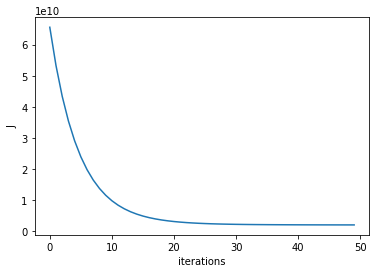

In [5]:
init_theta = np.zeros([X.shape[1],1])
init_theta
alpha = 0.1
iterations = 50

theta, J = gradient_descent(X, y, init_theta, alpha, iterations)
print('theta:')
print(theta)
print('final loss:')
final_J = J[-1]
print(final_J)
plt.plot(range(iterations), J)
plt.xlabel('iterations')
plt.ylabel('J')
plt.show()

### 3.2.1 predict

In [6]:
x = np.array([1,1650,3])
x = normalize(x, mu, sigma)
pred = x.dot(theta)

print('The price of a house with 1650 square feet and 3 bedrooms is %.0f' % pred)

The price of a house with 1650 square feet and 3 bedrooms is 338658


## 3.3 Normal Equations

In [7]:
def normal_eqn(X, y):
    """computes normal equetion"""
    return (np.linalg.inv(X.T.dot(X))).dot(X.T).dot(y)

In [8]:
theta_eqn = normal_eqn(X, y)
theta_diff = (((theta_eqn - theta) ** 2).sum())/((theta ** 2).sum())
J_diff = np.abs(compute_cost(X,y,theta_eqn) - final_J) / final_J
print('diff in theta is: %.5f' % theta_diff)
print('diff in J is: %.5f' % J_diff)

x = np.array([1,1650,3])
x = normalize(x, mu, sigma)
pred = x.dot(theta_eqn)

print('The price of a house with 1650 square feet and 3 bedrooms is %.0f' % pred)

diff in theta is: 0.00062
diff in J is: 0.00965
The price of a house with 1650 square feet and 3 bedrooms is 340413
